In [7]:
import sys
sys.path.append('..')

from src.robin.plotter.entities import KernelPlotter

kernel_plotter = KernelPlotter(path_output_csv="../src/robin/kernel/output_renfe2.csv",
                               path_config_supply="../data/supply_data.yml")

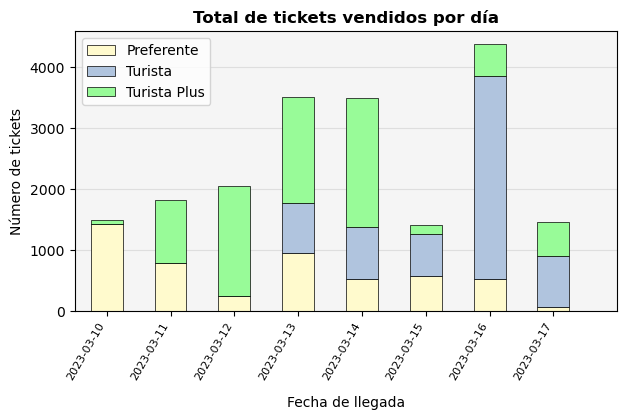

In [8]:
kernel_plotter.plot_tickets_sold(save_path="total_tickets_sold.png")

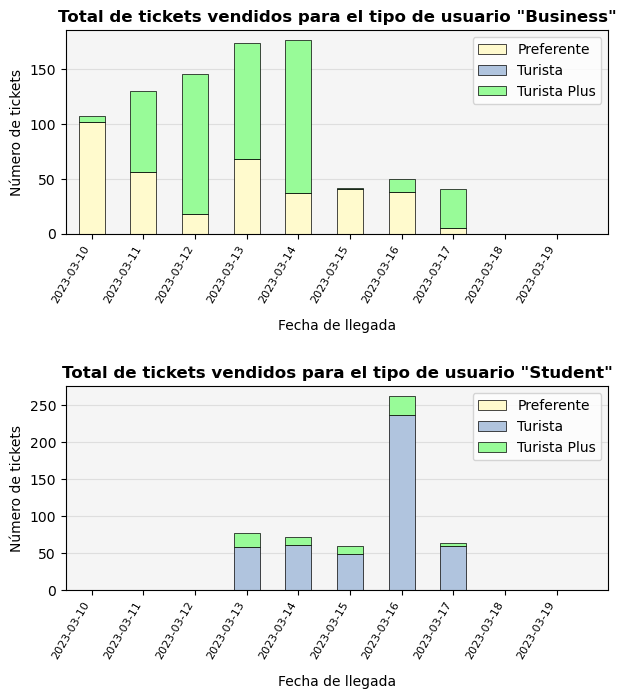

In [9]:
kernel_plotter.plot_tickets_by_user(save_path="tickets_sold_per_usertype.png")

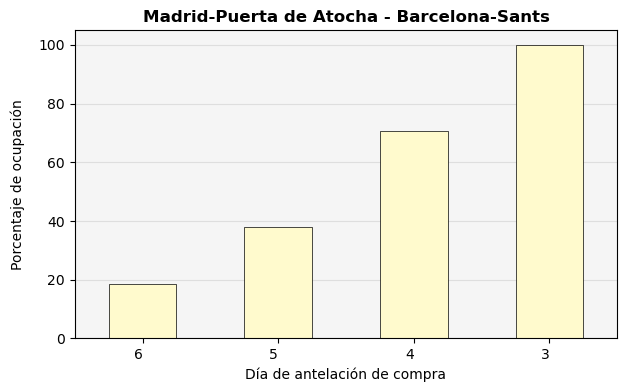

In [10]:
kernel_plotter.plot_capacity(service_id='03211_16-03-2023-21.10', save_path='capacity.png')

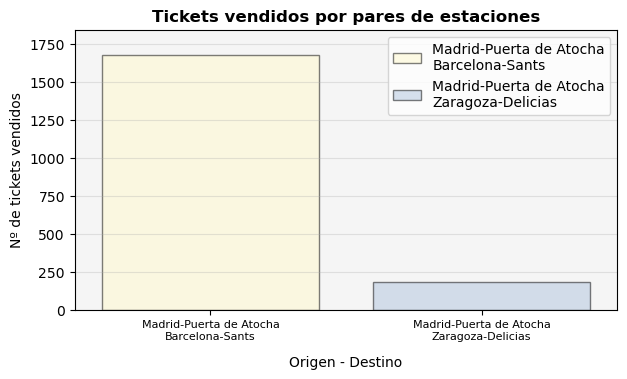

In [11]:
kernel_plotter.plot_pairs(save_path='pairs.png')

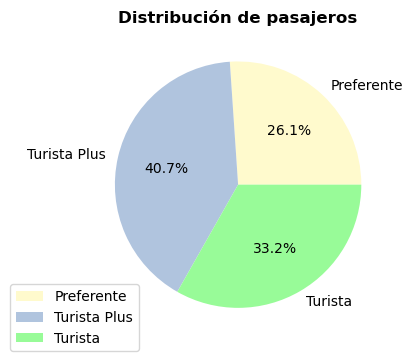

In [12]:
kernel_plotter.plot_tickets_sold_pie_chart(save_path='pie.png')